# Laboratorium 6
## ADAM GAWRYŚ, DAWID KLEINA

## Zadanie 1. (1 pkt.)
Dany jest transakcyjna baza danych zakupowych

In [25]:
transactions = [('Bread', 'Milk'),
                ('Bread', 'Diapers', 'Beer', 'Eggs'),
                ('Milk', 'Diapers', 'Beer', 'Cola'),
              ('Bread', 'Milk', 'Diapers', 'Beer'),
              ('Bread', 'Milk', 'Diapers', 'Cola'),
              ('Bread', 'Beer', 'Cola'),
              ('Bread', 'Milk', 'Eggs'),
              ('Bread', 'Milk'),
              ('Bread', 'Eggs'),
              ('Diapers', 'Beer', 'Cola'),
              ('Milk', 'Diapers', 'Beer', 'Cola'),
              ('Bread', 'Milk', 'Diapers', 'Beer', 'Eggs', 'Cola')]


## Zadanie 2. (3 pkt.)
Wykorzystując powyższy zbiór danych zastosuj algorytmy:

• A-priori

• Frequent Pattern Growth

do wyszukania zbiorów częstych zakładając poziom 30% minimalny poziom wsparcia (MinSupp).


### A-priori

In [26]:
from efficient_apriori import apriori

In [27]:
itemsets, rules = apriori(transactions, min_support=0.3, min_confidence = 1)
print(rules)

[{Eggs} -> {Bread}, {Beer, Milk} -> {Diapers}, {Cola, Milk} -> {Diapers}]


### Frequent Pattern Growth

In [28]:
from mlxtend.frequent_patterns import fpgrowth

In [29]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Beer,Bread,Cola,Diapers,Eggs,Milk
0,False,True,False,False,False,True
1,True,True,False,True,True,False
2,True,False,True,True,False,True
3,True,True,False,True,False,True
4,False,True,True,True,False,True
5,True,True,True,False,False,False
6,False,True,False,False,True,True
7,False,True,False,False,False,True
8,False,True,False,False,True,False
9,True,False,True,True,False,False


In [30]:
fpgrowth(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.750000,(Bread)
1,0.666667,(Milk)
2,0.583333,(Diapers)
3,0.583333,(Beer)
4,0.333333,(Eggs)
5,0.500000,(Cola)
6,0.500000,"(Milk, Bread)"
7,0.333333,"(Diapers, Bread)"
8,0.416667,"(Milk, Diapers)"
9,0.500000,"(Diapers, Beer)"


## Zadanie 3. (3 pkt.)
Na bazie zbiorów częstych wytypowanych w poprzednim zadaniu przez algorytm Frequent Pattern Growth zaprezentuj graficznie wytypowanych kandydatów w postaci drzewa FP-Tree.

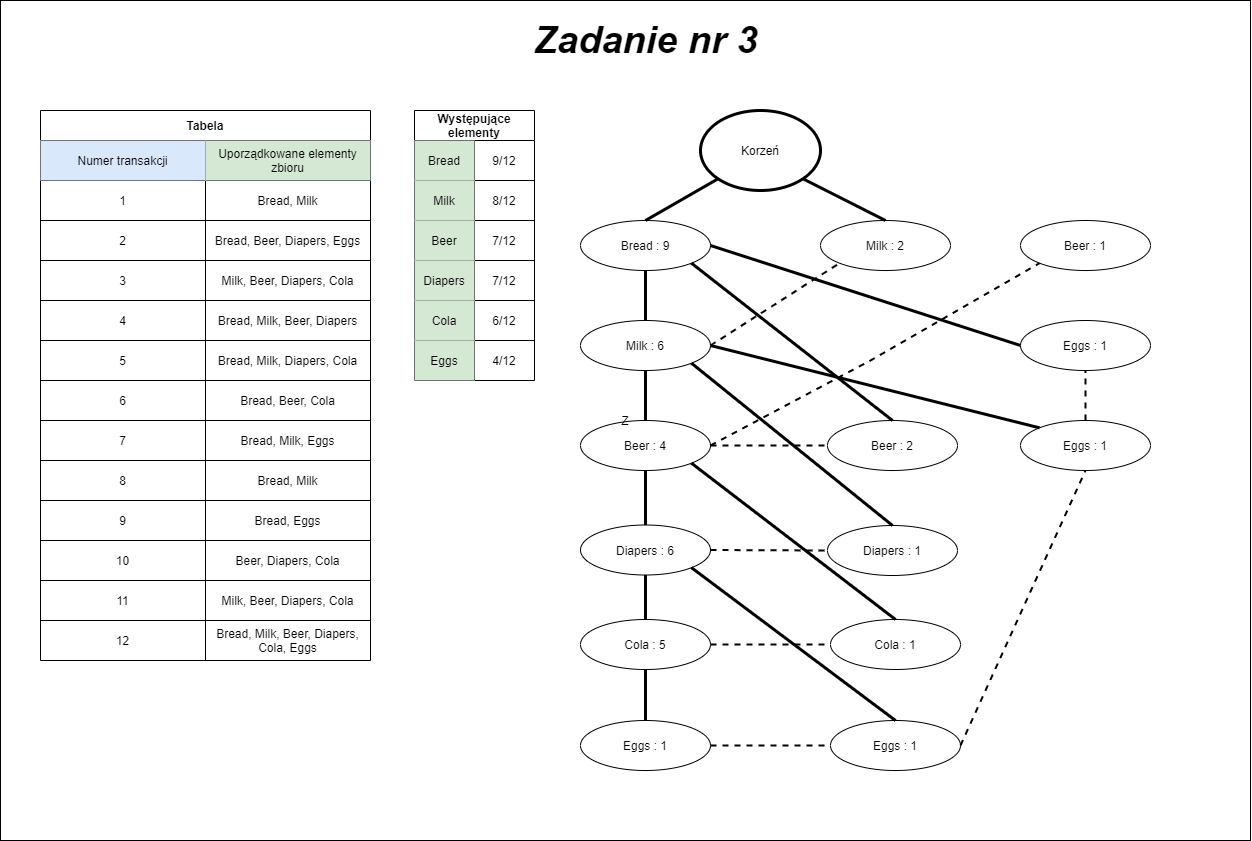

In [31]:
from IPython.display import Image 
Image(filename='DDLAB.png') 

## Zadanie 4. (3 pkt.)
Zaproponuj i zastosuj do rozwiązania problemu wyszukiwania reguł asocjacyjnych dowolny inny algorytm odkrywania reguł asocjacyjnych.

In [32]:
from mlxtend.frequent_patterns import fpmax

fpmax(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.333333,"(Eggs, Bread)"
1,0.333333,"(Cola, Milk, Diapers)"
2,0.333333,"(Cola, Diapers, Beer)"
3,0.333333,"(Beer, Bread)"
4,0.333333,"(Milk, Diapers, Beer)"
5,0.333333,"(Diapers, Bread)"
6,0.500000,"(Milk, Bread)"


# Wnioski
Laboratorium 6 skupiło naszą uwagę na metody asocjacyjne na realnym przykładzie z kupowanymi produktami w sklepie. W naszym notebooku zawarliśmy 3 metody. Są to: algorytm A-Priori, FP-growth oraz fp-max. Samo ich działanie zostało wytłuamaczone na wykładzie, a w przypadku wykonywania grafu do zadnaia 3 skorzystaliśmy także z wiedzy z internetu. Myślimy jednak, że sama wartość supportu jest za niska, ponieważ wszystkie produkty są wykorzystywane w zbiorze częstych uporządkowanych elementów, co czyni nasz graf znacznie bardziej obszernym i skomplikowanym. 